In [6]:
print("Hello world")

Hello world


In [7]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()

X = pd.DataFrame(california.data, columns= california.feature_names)
Y = pd.Series(california.target, name="MedHouseVal")
print(X.head())
print(Y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  
2  -1.332827  
3  -1.337818  
4  -1.337818  


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score, mean_squared_error

Y_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, Y_predict)
R2 = r2_score(Y_test, Y_predict)

print(f"MSE: {MSE:.2f}")
print(f"R2: {R2:.2f}")


MSE: 0.56
R2: 0.58


In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
polyModel = LinearRegression()
polyModel.fit(X_train_poly, Y_train)
Y_predict_poly = polyModel.predict(X_test_poly)

MSE_poly = mean_squared_error(Y_test, Y_predict_poly)
R2_poly = r2_score(Y_test, Y_predict_poly )

print(f"MSE POLY: {MSE_poly: .2f}")
print(f"R2 POLY: {R2_poly: .2f}")

MSE POLY:  0.46
R2 POLY:  0.65


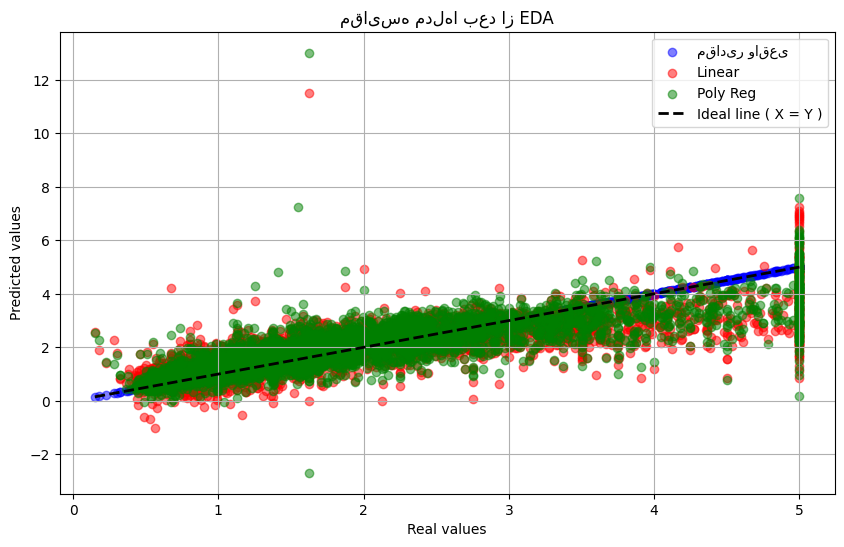

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test, color='blue', alpha=0.5, label='مقادیر واقعی')
plt.scatter(Y_test, Y_predict, color="red", alpha=0.5, label='Linear') 
plt.scatter(Y_test, Y_predict_poly, color="green", alpha=0.5, label="Poly Reg")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, label='Ideal line ( X = Y )')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('مقایسه مدل‌ها بعد از EDA')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)
elastic = ElasticNet(alpha=1, l1_ratio=0.01)

ridge.fit(X_train, Y_train)
lasso.fit(X_train, Y_train)
elastic.fit(X_train, Y_train)

Y_ridge = ridge.predict(X_test)
Y_lasso = lasso.predict(X_test)
Y_elastic = elastic.predict(X_test)

MSE_ridge = mean_squared_error(Y_test, Y_ridge)
MSE_lasso = mean_squared_error(Y_test, Y_lasso)
MSE_elastic = mean_squared_error(Y_test, Y_elastic)

R2_ridge = r2_score(Y_test , Y_ridge)
R2_lasso = r2_score(Y_test , Y_lasso)
R2_elastic = r2_score(Y_test , Y_elastic)

print(f"MSE_ridge is: {MSE_ridge: .2f}")
print(f"MSE_lasso is: {MSE_lasso: .2f}")
print(f"MSE_elastic is: {MSE_elastic: .2f}")

print(f"R2_ridge is: {R2_ridge: .2f}")
print(f"R2_lasso is: {R2_lasso: .2f}")
print(f"R2_elastic is: {R2_elastic: .2f}")


MSE_ridge is:  0.56
MSE_lasso is:  0.55
MSE_elastic is:  0.81
R2_ridge is:  0.58
R2_lasso is:  0.58
R2_elastic is:  0.38


In [27]:
from sklearn.model_selection import GridSearchCV

gridLasso = GridSearchCV(Lasso(), {'alpha':[0.001, 0.01, 0.1, 1.0, 10.0]}, cv=5, scoring='neg_mean_squared_error')
gridRidge = GridSearchCV(Ridge(), {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}, cv=5, scoring='neg_mean_squared_error')
gridElastic = GridSearchCV(ElasticNet(), {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}, cv=5, scoring='neg_mean_squared_error')

gridRidge.fit(X_train, Y_train)
gridLasso.fit(X_train, Y_train)
gridElastic.fit(X_train, Y_train)

Y_ridge_grid = gridRidge.best_estimator_.predict(X_test)
Y_lasso_grid = gridLasso.best_estimator_.predict(X_test)
Y_elastic_grid = gridElastic.best_estimator_.predict(X_test)

print(f" Best params for Ridge : {gridRidge.best_params_}")
print(f" Best params for Lasso : {gridLasso.best_params_}")
print(f" Best params for ElasticNet : {gridElastic.best_params_}")

MSE_ridge_grid = mean_squared_error(Y_test, Y_ridge_grid)
MSE_lasso_grid = mean_squared_error(Y_test, Y_lasso_grid)
MSE_elastic_grid = mean_squared_error(Y_test, Y_elastic_grid)

R2_ridge_grid = r2_score(Y_test , Y_ridge_grid)
R2_lasso_grid = r2_score(Y_test , Y_lasso_grid)
R2_elastic_grid = r2_score(Y_test , Y_elastic_grid)

print(f"MSE_ridge_grid is: {MSE_ridge_grid: .2f}")
print(f"MSE_lasso_grid is: {MSE_lasso_grid: .2f}")
print(f"MSE_elastic_grid is: {MSE_elastic_grid: .2f}")

print(f"R2_ridge_grid is: {R2_ridge_grid: .2f}")
print(f"R2_lasso_grid is: {R2_lasso_grid: .2f}")
print(f"R2_elastic_grid is: {R2_elastic_grid: .2f}")

 Best params for Ridge : {'alpha': 1.0}
 Best params for Lasso : {'alpha': 0.001}
 Best params for ElasticNet : {'alpha': 0.001, 'l1_ratio': 0.9}
MSE_ridge_grid is:  0.56
MSE_lasso_grid is:  0.55
MSE_elastic_grid is:  0.55
R2_ridge_grid is:  0.58
R2_lasso_grid is:  0.58
R2_elastic_grid is:  0.58


In [30]:
from sklearn.model_selection import GridSearchCV

gridLasso = GridSearchCV(Lasso(), {'alpha':[0.001, 0.01, 0.1, 1.0]}, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gridRidge = GridSearchCV(Ridge(), {'alpha': [0.001, 0.01, 0.1, 1.0]}, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gridElastic = GridSearchCV(ElasticNet(), {'alpha': [0.001, 0.01, 0.1, 1.0], 'l1_ratio': [0.1, 0.5, 0.9]}, cv=3,  scoring='neg_mean_squared_error', n_jobs=-1)

gridRidge.fit(X_train_poly, Y_train)
gridLasso.fit(X_train_poly, Y_train)
gridElastic.fit(X_train_poly, Y_train)

Y_ridge_grid = gridRidge.best_estimator_.predict(X_test_poly)
Y_lasso_grid = gridLasso.best_estimator_.predict(X_test_poly)
Y_elastic_grid = gridElastic.best_estimator_.predict(X_test_poly)

print(f" Best params for Ridge : {gridRidge.best_params_}")
print(f" Best params for Lasso : {gridLasso.best_params_}")
print(f" Best params for ElasticNet : {gridElastic.best_params_}")

MSE_ridge_grid = mean_squared_error(Y_test, Y_ridge_grid)
MSE_lasso_grid = mean_squared_error(Y_test, Y_lasso_grid)
MSE_elastic_grid = mean_squared_error(Y_test, Y_elastic_grid)

R2_ridge_grid = r2_score(Y_test , Y_ridge_grid)
R2_lasso_grid = r2_score(Y_test , Y_lasso_grid)
R2_elastic_grid = r2_score(Y_test , Y_elastic_grid)

print(f"MSE_ridge_grid is: {MSE_ridge_grid: .2f}")
print(f"MSE_lasso_grid is: {MSE_lasso_grid: .2f}")
print(f"MSE_elastic_grid is: {MSE_elastic_grid: .2f}")

print(f"R2_ridge_grid is: {R2_ridge_grid: .2f}")
print(f"R2_lasso_grid is: {R2_lasso_grid: .2f}")
print(f"R2_elastic_grid is: {R2_elastic_grid: .2f}")

 Best params for Ridge : {'alpha': 1.0}
 Best params for Lasso : {'alpha': 0.1}
 Best params for ElasticNet : {'alpha': 0.1, 'l1_ratio': 0.1}
MSE_ridge_grid is:  0.46
MSE_lasso_grid is:  0.68
MSE_elastic_grid is:  0.59
R2_ridge_grid is:  0.65
R2_lasso_grid is:  0.48
R2_elastic_grid is:  0.55


C:\Users\Raven\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.154e+00, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(


In [1]:
import kagglehub

path = kagglehub.dataset_download("camnugent/california-housing-prices")

print(path)

ModuleNotFoundError: No module named 'kagglehub'